In [1]:
options(device=pdf) # turn off flashy window on each block execution
# options(repr.plot.width=6, repr.plot.height=4)
Sys.setlocale("LC_ALL", "C")
initialWidth = getOption('width')
options(width=80) # for old folks like me who can't see shit and set font large

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

In the following video, we ask you to install the "tm" package to perform the pre-processing steps. Due to function changes that occurred after this video was recorded, you will need to run the following command immediately after converting all of the words to lowercase letters (it converts all documents in the corpus to the PlainTextDocument type):

corpus = tm_map(corpus, PlainTextDocument)

Then you can continue with the R commands as they are in the video.

If the code length(stopwords("english")) does not return 174 for you, then please run the line of code in this file, which will store the standard stop words in a variable called sw. When removing stop words, use tm_map(corpus, removeWords, sw) instead of tm_map(corpus, removeWords, stopwords("english")). 

In [3]:
tweets = read.csv('data/tweets.csv.xz', stringsAsFactors=F)

In [4]:
str(tweets)

'data.frame':	1181 obs. of  2 variables:
 $ Tweet: chr  "I have to say, Apple has by far the best customer care service I have ever received! @Apple @AppStore" "iOS 7 is so fricking smooth & beautiful!! #ThanxApple @Apple" "LOVE U @APPLE" "Thank you @apple, loving my new iPhone 5S!!!!!  #apple #iphone5S pic.twitter.com/XmHJCU4pcb" ...
 $ Avg  : num  2 2 1.8 1.8 1.8 1.8 1.8 1.6 1.6 1.6 ...


In [5]:
tweets$Negative = as.factor(tweets$Avg <= -1)

In [6]:
table(tweets$Negative)


FALSE  TRUE 
  999   182 

In [8]:
library(tm)
library(SnowballC)

In [9]:
corpus = Corpus(VectorSource(tweets$Tweet))
corpus

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1181

In [11]:
corpus[[1]]$content

[1] "I have to say, Apple has by far the best customer care service I have ever received! @Apple @AppStore"

In [12]:
corpus = tm_map(corpus, tolower)
corpus = tm_map(corpus, PlainTextDocument)

In [13]:
corpus[[1]]$content

[1] "i have to say, apple has by far the best customer care service i have ever received! @apple @appstore"

In [14]:
corpus = tm_map(corpus, removePunctuation)

In [15]:
corpus[[1]]$content

[1] "i have to say apple has by far the best customer care service i have ever received apple appstore"

In [16]:
stopwords('english')[1:10]

[1] "i"         "me"        "my"        "myself"    "we"        "our"      
 [7] "ours"      "ourselves" "you"       "your"

In [17]:
corpus = tm_map(corpus, removeWords, c('apple', stopwords('english')))

In [18]:
corpus[[1]]$content

[1] "   say    far  best customer care service   ever received  appstore"

In [20]:
corpus = tm_map(corpus, stemDocument)
corpus[[1]]$content

[1] "   say    far  best custom care servic   ever receiv  appstor"

In [21]:
freq = DocumentTermMatrix(corpus)
freq

<<DocumentTermMatrix (documents: 1181, terms: 3289)>>
Non-/sparse entries: 8980/3875329
Sparsity           : 100%
Maximal term length: 115
Weighting          : term frequency (tf)

In [22]:
inspect(freq[1000:1005,505:515])

<<DocumentTermMatrix (documents: 6, terms: 11)>>
Non-/sparse entries: 1/65
Sparsity           : 98%
Maximal term length: 9
Weighting          : term frequency (tf)

              Terms
Docs           cheapen cheaper check cheep cheer cheerio cherylcol chief
  character(0)       0       0     0     0     0       0         0     0
  character(0)       0       0     0     0     0       0         0     0
  character(0)       0       0     0     0     0       0         0     0
  character(0)       0       0     0     0     0       0         0     0
  character(0)       0       0     0     0     0       0         0     0
  character(0)       0       0     0     0     1       0         0     0
              Terms
Docs           chiiiiqu child children
  character(0)        0     0        0
  character(0)        0     0        0
  character(0)        0     0        0
  character(0)        0     0        0
  character(0)        0     0        0
  character(0)        0     0        0


In [23]:
findFreqTerms(freq, lowfreq = 20)

[1] "android"              "anyon"                "app"                 
 [4] "appl"                 "back"                 "batteri"             
 [7] "better"               "buy"                  "can"                 
[10] "cant"                 "come"                 "dont"                
[13] "fingerprint"          "freak"                "get"                 
[16] "googl"                "ios7"                 "ipad"                
[19] "iphon"                "iphone5"              "iphone5c"            
[22] "ipod"                 "ipodplayerpromo"      "itun"                
[25] "just"                 "like"                 "lol"                 
[28] "look"                 "love"                 "make"                
[31] "market"               "microsoft"            "need"                
[34] "new"                  "now"                  "one"                 
[37] "phone"                "pleas"                "promo"               
[40] "promoipodplayerpromo" "realli"               "releas"              
[43] "samsung"              "say"                  "store"               
[46] "thank"                "think"                "time"                
[49] "twitter"              "updat"                "use"                 
[52] "via"                  "want"                 "well"                
[55] "will"                 "work"

In [24]:
sparse = removeSparseTerms(freq, 0.995)
sparse

<<DocumentTermMatrix (documents: 1181, terms: 309)>>
Non-/sparse entries: 4669/360260
Sparsity           : 99%
Maximal term length: 20
Weighting          : term frequency (tf)

In [25]:
tweetsSparse = as.data.frame(as.matrix(sparse))

In [26]:
colnames(tweetsSparse) = make.names(
    colnames(tweetsSparse))

In [27]:
tweetsSparse$Negative = tweets$Negative

In [28]:
library(caTools)
set.seed(123)
split = sample.split(tweetsSparse$Negative,
                     SplitRatio=0.7)
trainSparse = subset(tweetsSparse, split==T)
testSparse = subset(tweetsSparse, split==F)

In [29]:
findFreqTerms(freq, lowfreq = 100)

[1] "iphon" "itun"  "new"

In [30]:
library(rpart)
library(rpart.plot)

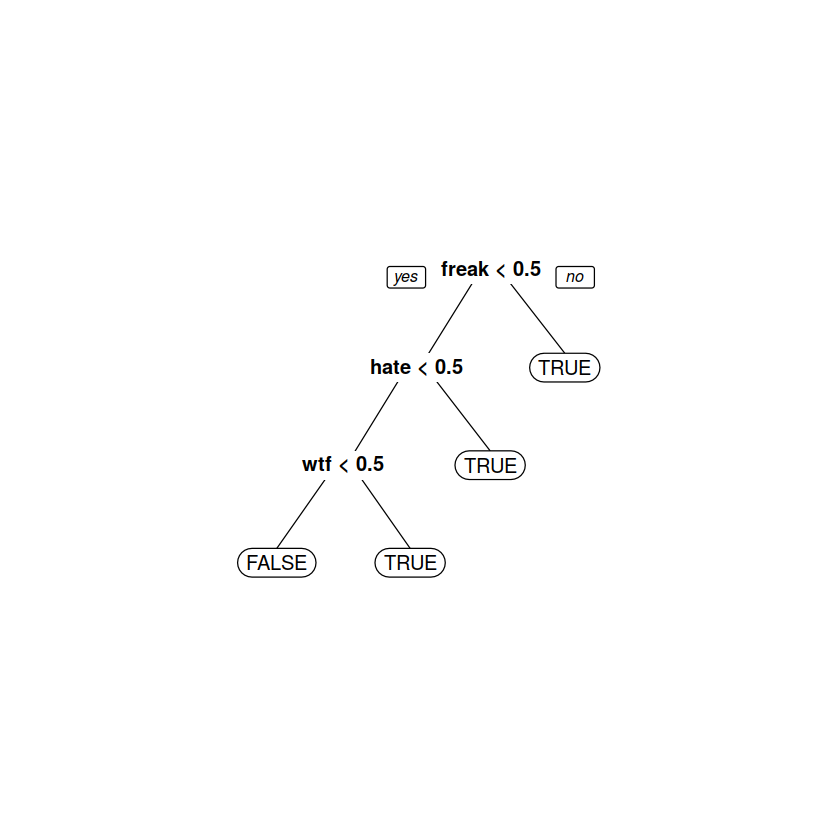

In [31]:
tweetCART = rpart(Negative ~ .,
                  data=trainSparse,
                  method='class')
prp(tweetCART)

In [32]:
predictCART = predict(tweetCART,
                      newdata=testSparse,
                      type='class')
table(testSparse$Negative, predictCART)

       predictCART
        FALSE TRUE
  FALSE   294    6
  TRUE     37   18

In [33]:
(294+18)/(294+6+37+18)

[1] 0.8788732

In [34]:
table(testSparse$Negative)


FALSE  TRUE 
  300    55 

In [35]:
300/355

[1] 0.8450704

In [38]:
library(randomForest)
set.seed(123)

In [39]:
tweetRF = randomForest(Negative ~ .,
                       data=trainSparse)

In [40]:
predictRF = predict(tweetRF, newdata=testSparse)
table(testSparse$Negative, predictRF)

       predictRF
        FALSE TRUE
  FALSE   293    7
  TRUE     34   21

In [41]:
(293+21)/(293+7+34+21)

[1] 0.884507

In [51]:
tweetLog = glm(Negative ~ ., data=trainSparse,
               family='binomial')
predictLog = predict(tweetLog, newdata=testSparse,
                     type='response')

Warning message:
: glm.fit: algorithm did not convergeWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
In predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == : prediction from a rank-deficient fit may be misleading

In [52]:
t = table(testSparse$Negative, predictLog > 0.5)
t
sum(diag(t)) / sum(t)

       
        FALSE TRUE
  FALSE   246   54
  TRUE     23   32

[1] 0.7830986